# Compare logistic regression and kNN

This is an open-ended lab.

You should:

- Load in the wine dataset (create target, concatenate, normalize predictors)
- Do EDA on predictors
- Select predictors of interest
- Load KNeighborsClassifier and LogisticRegression from sklearn
- Compare performance between the two using stratified cross-validation
- [Optional bonus] Plot the results of kNN vs. Logistic regression using the plotting functions I wrote yesterday and today. You may have to modify the functions to work for you.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

wine_palette = sns.xkcd_palette(['dandelion', 'claret'])

In [22]:
red = pd.read_csv('../assets/datasets/winequality-red.csv', delimiter = ';')
white = pd.read_csv('../assets/datasets/winequality-white.csv', delimiter = ';')

In [23]:
red['red'] = 1
white['red'] = 0

In [24]:
red.head(1)
white.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0


In [25]:
wine = pd.concat([red, white])

In [26]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


In [27]:
valid_cols = [col for col in wine.columns if col != 'red']
print valid_cols
((wine[valid_cols] - wine[valid_cols].mean()) / wine[valid_cols].std())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157
5,0.142462,1.945705,-2.192664,-0.765739,0.541370,-0.987375,-1.340094,1.034913,1.812950,0.193082,-0.915394,-0.937157
6,0.528136,1.581266,-1.779776,-0.807775,0.370106,-0.874695,-1.003940,0.568040,0.506876,-0.478935,-0.915394,-0.937157
7,0.065328,1.884965,-2.192664,-0.891847,0.255930,-0.874695,-1.676247,-0.032226,1.066622,-0.411733,-0.412338,1.353124
8,0.451001,1.459786,-2.055034,-0.723703,0.484282,-1.212735,-1.729324,0.701432,0.880040,0.260284,-0.831551,1.353124
9,0.219597,0.973867,0.284664,0.138039,0.427194,-0.762016,-0.243173,1.034913,0.817846,1.805921,0.006874,-0.937157


(-0.3, 1.3)

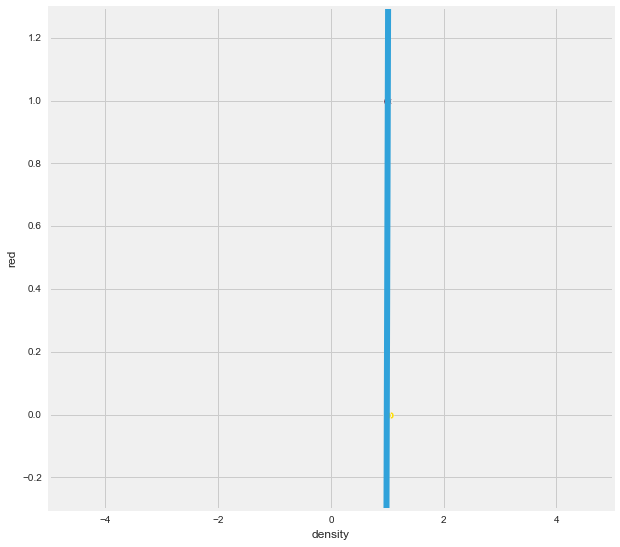

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)

# set the built in points to transparent
sns.regplot(wine.density, wine.red, ax=ax, scatter_kws=dict(alpha=0))

wine_palette = sns.xkcd_palette(['dandelion', 'claret'])

# do one scatter plot for each type of wine:
ax.scatter(wine.density[wine.red == 0],
           wine.red[wine.red == 0],
           c=wine_palette[0], s=50)

ax.scatter(wine.density[wine.red == 1],
           wine.red[wine.red == 1],
           c=wine_palette[1], s=50)

ax.set_xlim(-5, 5)
ax.set_ylim(-0.3, 1.3)

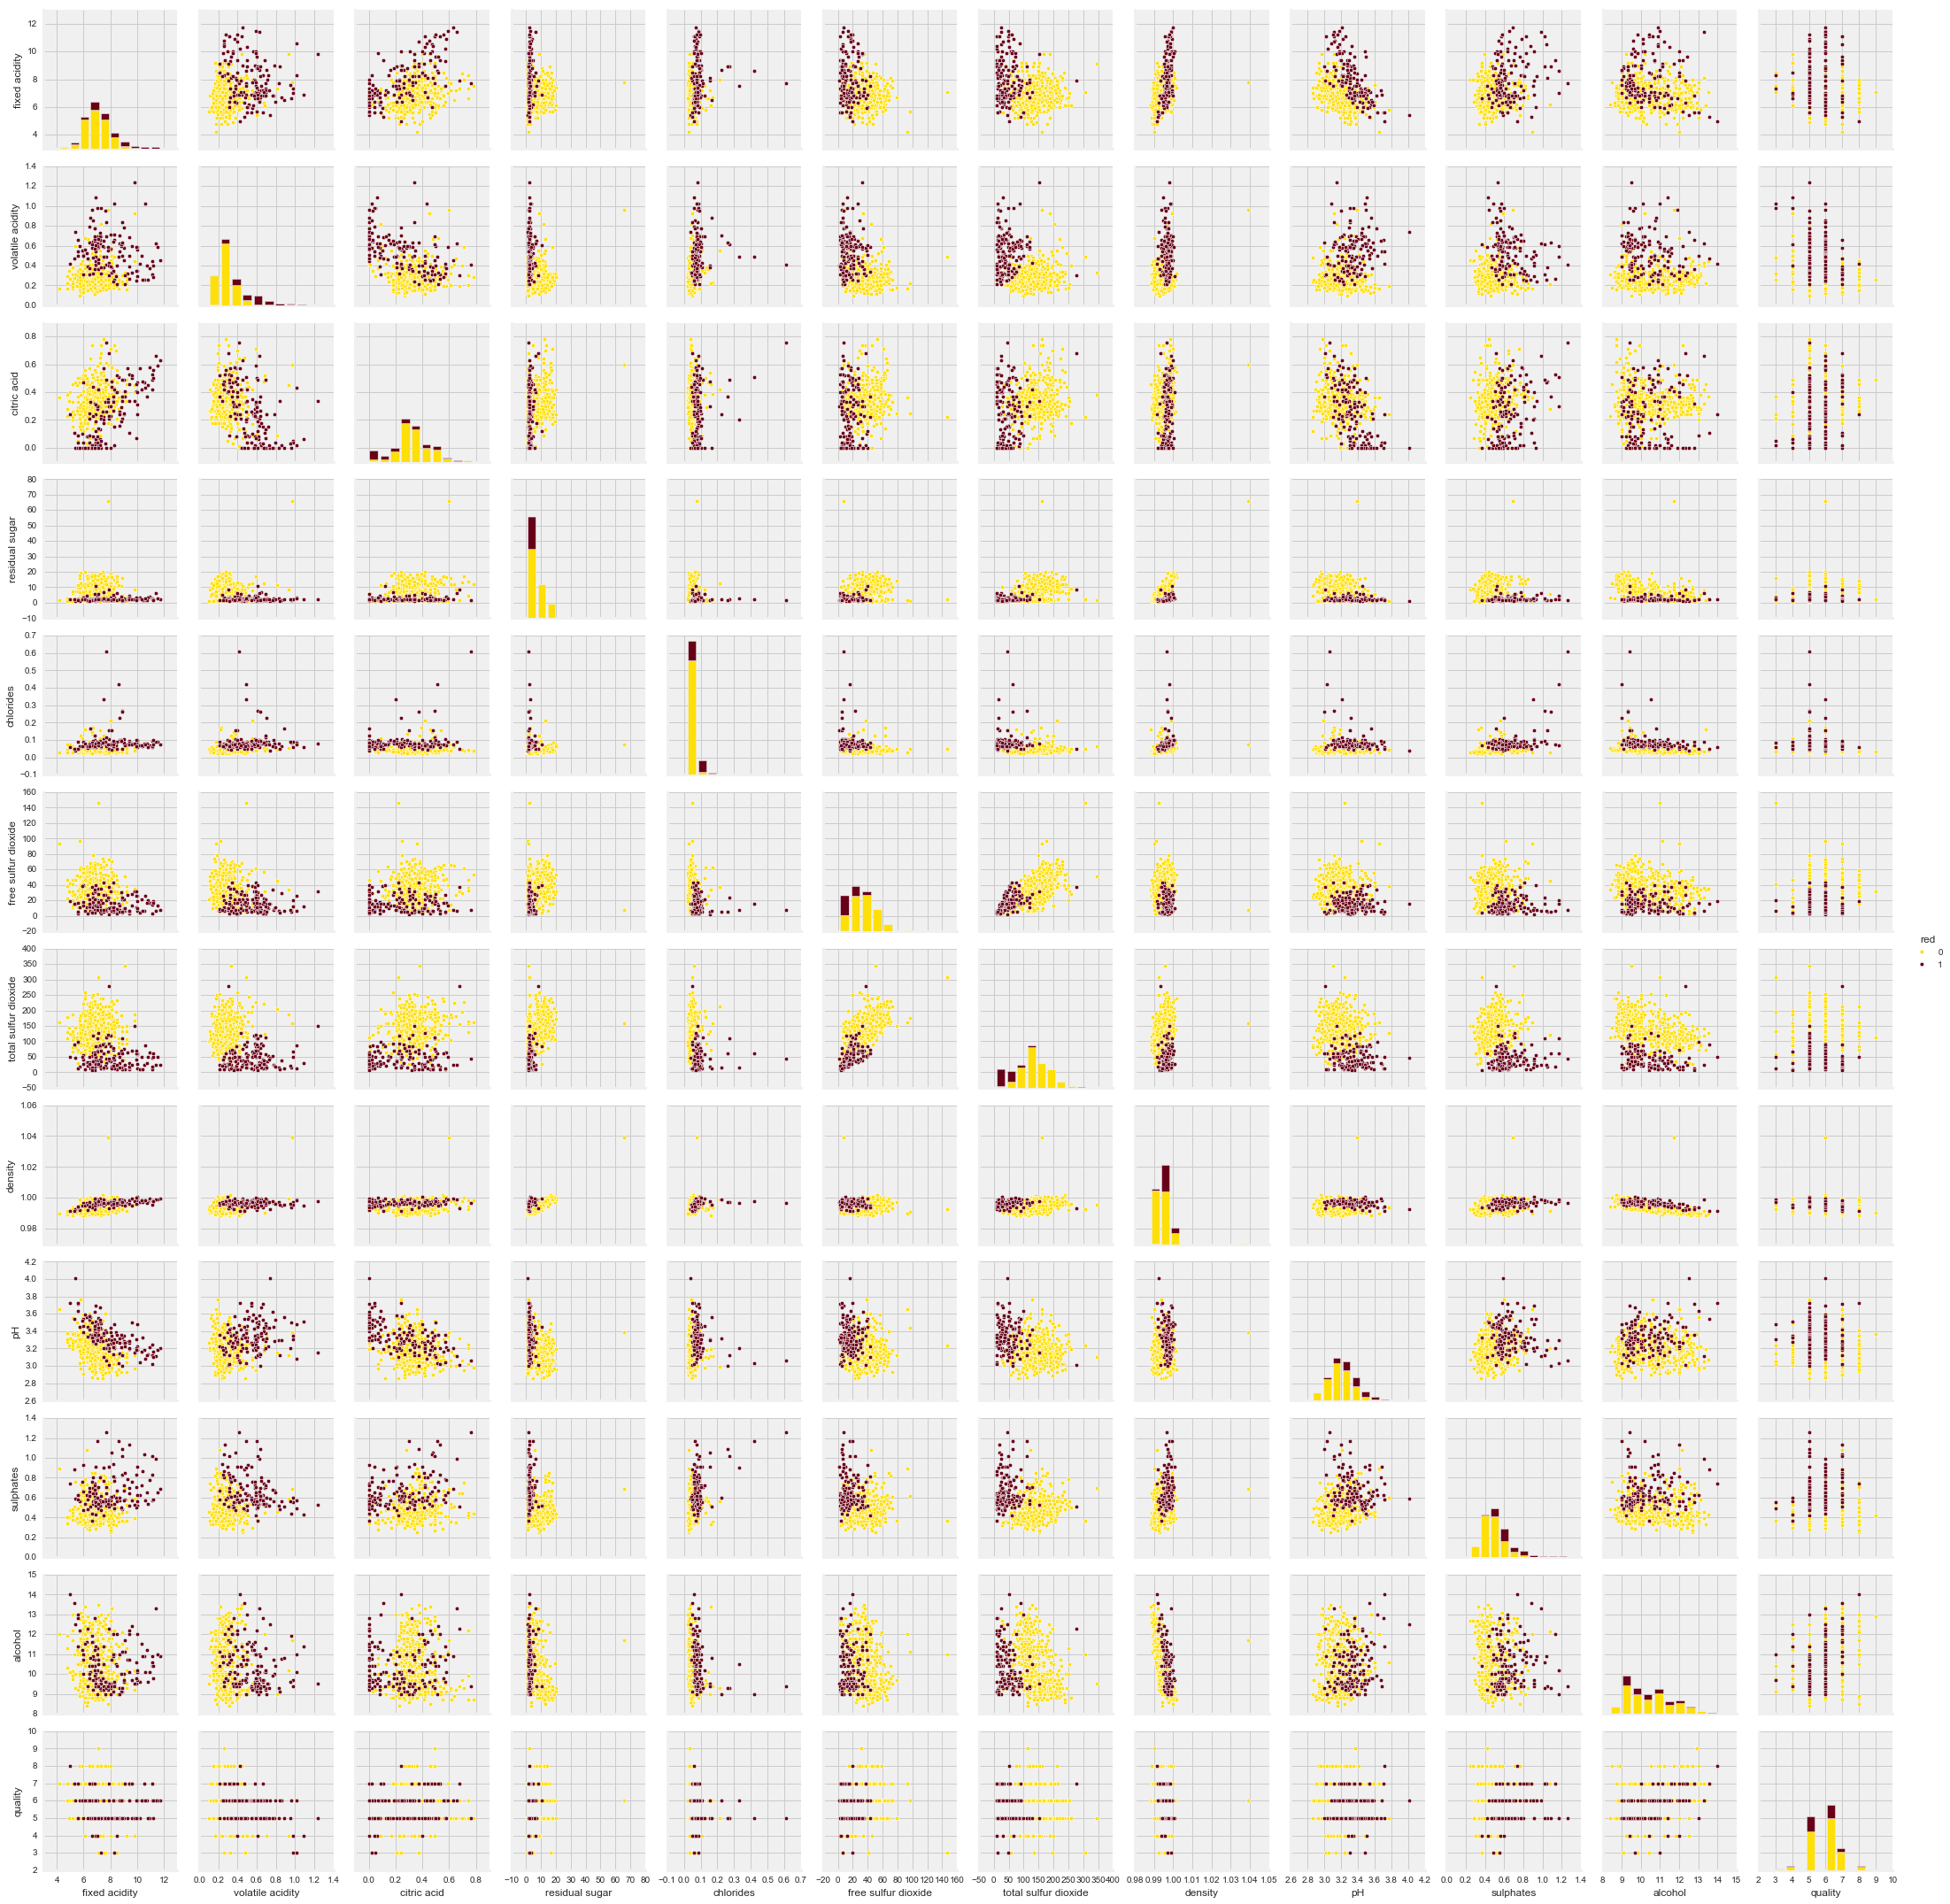

In [30]:
wine_palette = sns.xkcd_palette(['dandelion', 'claret'])

sample_inds = np.random.choice(range(0,wine.shape[0]), 
                               size=int(round(wine.shape[0]*0.1)), 
                               replace=False).astype(int)


winevars = [x for x in wine.columns if x != 'red']

sns.pairplot(wine.iloc[sample_inds, :], 
             vars=winevars, 
             hue="red", 
             palette={k:wine_palette[k] for k in range(2)})

In [31]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


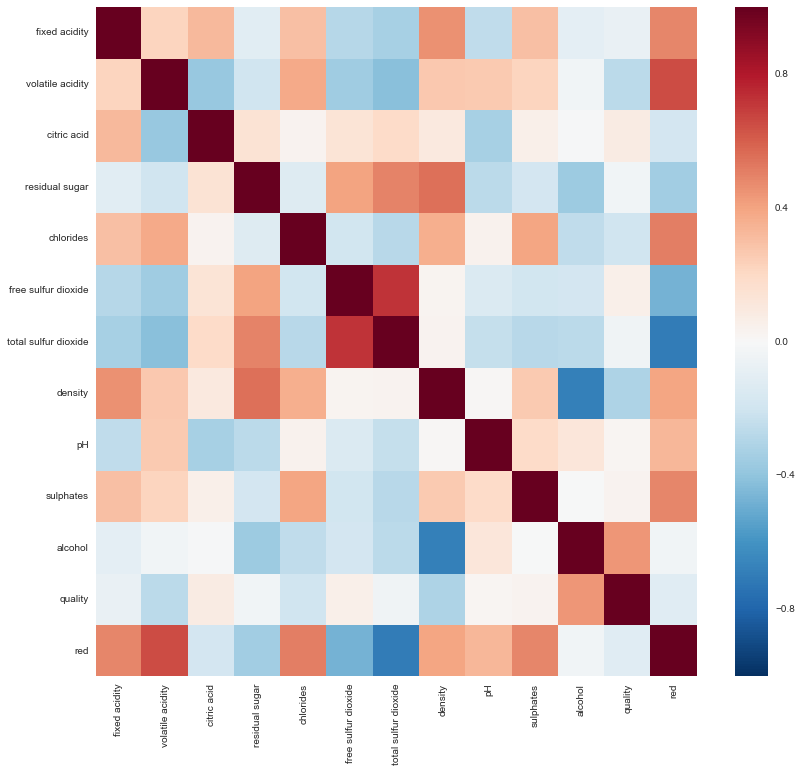

In [39]:
sns.set(rc={"figure.figsize": (12, 12)})

sns.heatmap(wine.corr())

In [97]:
from sklearn.neighbors import KNeighborsClassifier
import patsy

knn = KNeighborsClassifier(n_neighbors=3)

In [98]:
formula = "red ~ chlorides + density + pH + C(quality) - 1"

Y, X = patsy.dmatrices(formula, data=wine)

In [99]:
knn.fit(X, np.ravel(Y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [100]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33)

In [101]:
knn.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [102]:
knn.score(X_test, np.ravel(Y_test))

0.92400932400932401